# Ejercicio 4 – Comparación de librerías de visualización
 ### Objetivo  
Comparar las librerías **Matplotlib**, **Seaborn** y **Plotly** para la representación de datos.  
Se usa el dataset *Air Quality* leído desde la nube.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='CO(GT)', ylabel='NO2(GT)'>

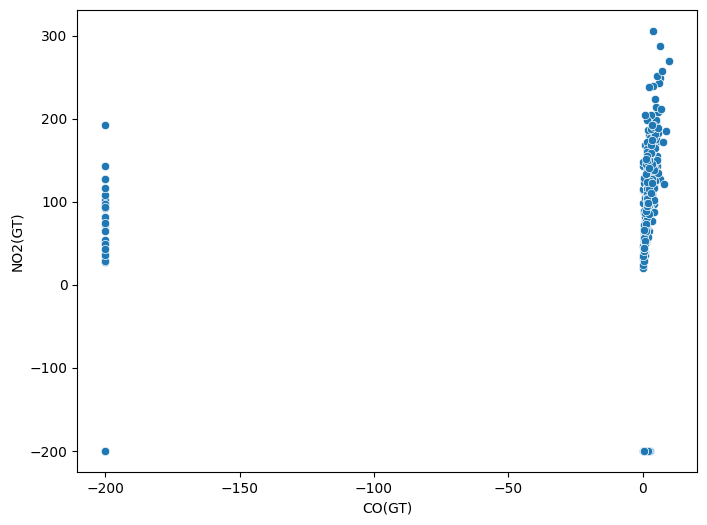

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pip install plotly
import plotly.express as px

import zipfile
import io
import requests

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip"
response = requests.get(url)
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    with z.open('AirQualityUCI.csv') as f:
        df = pd.read_csv(f, sep=";", decimal=",", encoding="latin1")

df = df.dropna(axis=1, how="all")
df.columns = df.columns.str.strip()

for c in ["CO(GT)", "NO2(GT)"]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c].astype(str).str.replace(",", "."), errors="coerce")

df = df.dropna(subset=["CO(GT)", "NO2(GT)"]).sample(500, random_state=1)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="CO(GT)", y="NO2(GT)")

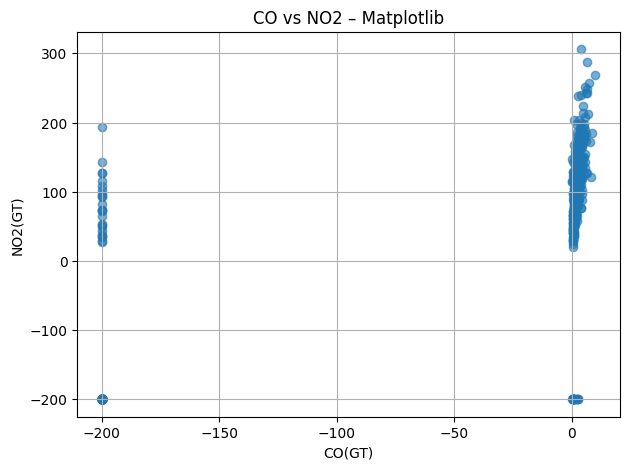

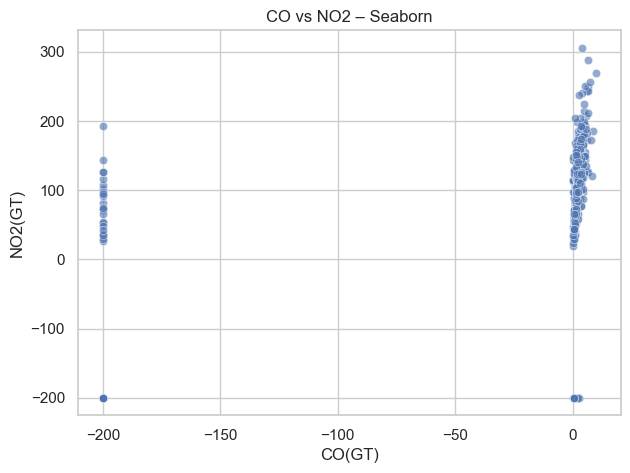

In [14]:
plt.figure(figsize=(7,5))
plt.scatter(df["CO(GT)"], df["NO2(GT)"], alpha=0.6)
plt.xlabel("CO(GT)")
plt.ylabel("NO2(GT)")
plt.title("CO vs NO2 – Matplotlib")
plt.grid(True)
plt.show()
sns.set(style="whitegrid")
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="CO(GT)", y="NO2(GT)", alpha=0.6)
plt.title("CO vs NO2 – Seaborn")
plt.show()

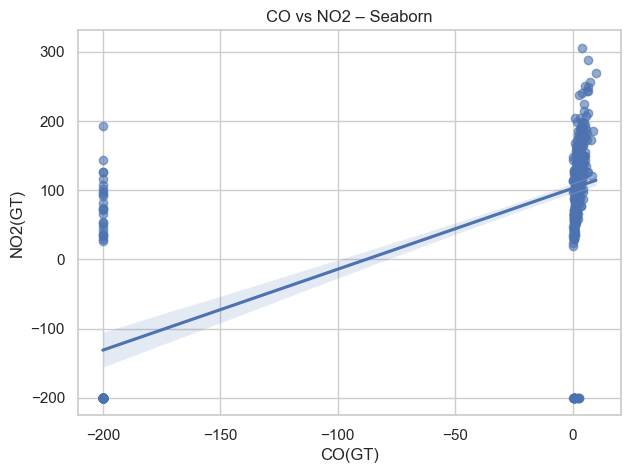

In [15]:
plt.figure(figsize=(7,5))
sns.regplot(data=df, x="CO(GT)", y="NO2(GT)", scatter_kws={'alpha':0.6})
plt.title("CO vs NO2 – Seaborn")
plt.show() 
fig = px.scatter(df, x="CO(GT)", y="NO2(GT)",
                 title="CO vs NO2 – Plotly (interactivo)",
                 trendline="ols",
                 labels={"CO(GT)": "CO (mg/m³)", "NO2(GT)": "NO2 (µg/m³)"})
fig.show()
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [12]:
%pip install statsmodels

fig = px.scatter(df, x="CO(GT)", y="NO2(GT)",
                 title="CO vs NO2 – Plotly (interactivo)",
                 trendline="ols",
                 opacity=0.6)
fig.show()

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Conclusión – Comparación de librerías
| Librería | Tipo de visualización | Ventajas | Desventajas |
|-----------|----------------------|-----------|--------------|
| **Matplotlib** | Estática, bajo nivel | Control total de ejes y estilos; ideal para publicaciones | Requiere más líneas de código |
| **Seaborn** | Estática, alto nivel | Estética mejorada y funciones estadísticas integradas | Menos personalización fina |
| **Plotly** | Interactiva | Permite zoom, hover y dashboards web | Requiere entorno compatible y más recursos |

**Conclusión:** Matplotlib y Seaborn son ideales para informes estáticos; Plotly sobresale en exploración interactiva y presentaciones.
